In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Hazael/FINAL - FINAL.csv', encoding='latin1', error_bad_lines=False)

# Print the first five rows
print(df.head(5))

# Get the number of rows and columns
num_rows = df.shape[0]
num_columns = df.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Convert column headers to lowercase
df.columns = df.columns.str.lower()

# Print the list of column headers
column_headers = df.columns.tolist()
print("Column headers:", column_headers)

<ipython-input-3-36b28f42656f>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/Hazael/FINAL - FINAL.csv', encoding='latin1', error_bad_lines=False)


                                               title  month  year  \
0               Beanstalk Farms cryptocurrency theft  April  2022   
1                               CashMama Data Breach  April  2022   
2  Lazarus Ã¢ÂÂTrojanisedÃ¢ÂÂ decentralised f...  April  2022   
3                         Ronin cryptocurrency theft  March  2022   
4                          TransUnion SA Data Breach  March  2021   

                                             summary     incident  \
0  the decentralised finance platform Beanstalk F...        Theft   
1  India-based loans app CashMama reported a Data...  Data Breach   
2  North Korean state-sponsored threat group Laza...     Multiple   
3  On March 23 2022, blockchain project Ronin los...        Theft   
4  Credit bureau TransUnion SA suffered a cyber a...  Data Breach   

                   actor                                        description  \
0                Unknown  On April 17, 2022, the decentralised finance p...   
1           

In [ ]:
# Assuming you have the data loaded in a DataFrame called 'df'
# If not, you can load the data using pd.read_csv() or other appropriate methods.

# Check for missing values in the DataFrame
print(df.isna().sum())

title               0
month               0
year                0
summary             0
incident            0
actor               0
description         0
country             0
methods             0
financial_impact    0
dtype: int64


# **DATA ANALYSIS**

## **ANALYSIS**

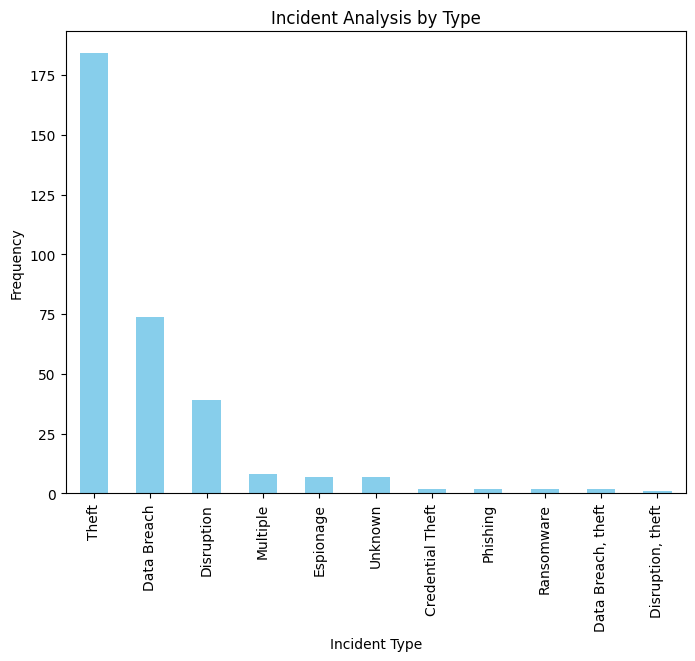

In [ ]:
import matplotlib.pyplot as plt

# Group incidents by type and count the occurrences
incident_counts = df['incident'].value_counts()

# Plot the incident frequencies using a bar plot
plt.figure(figsize=(8, 6))
incident_counts.plot(kind='bar', color='skyblue')
plt.title('Incident Analysis by Type')
plt.xlabel('Incident Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Actor Analysis

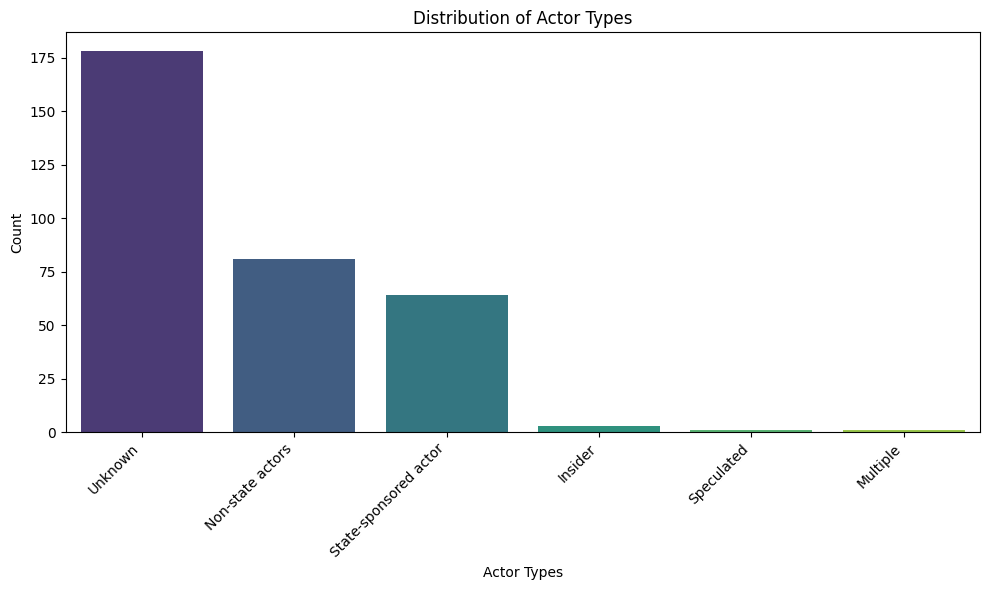

In [ ]:
import seaborn as sns

# Check the unique values in the 'actor' column
actor_counts = df['actor'].value_counts()

# Plot the distribution of actor types using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=actor_counts.index, y=actor_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Actor Types')
plt.ylabel('Count')
plt.title('Distribution of Actor Types')
plt.tight_layout()
plt.show()

Time Series Analysis

In [ ]:
!pip install prophet

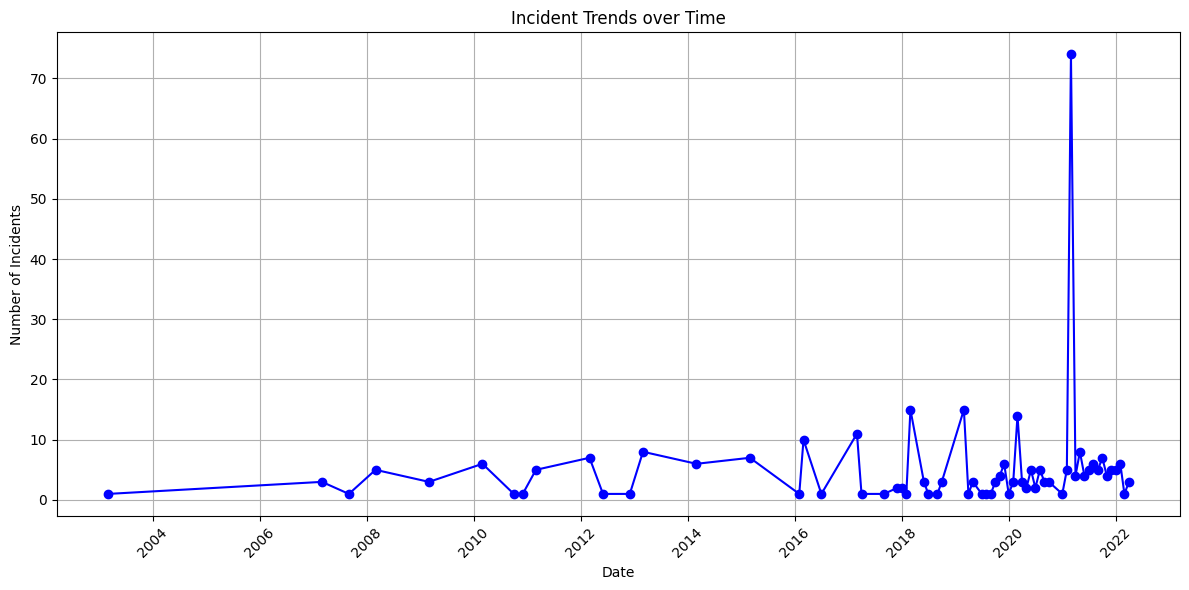

In [ ]:
from prophet import Prophet

month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['month'] = df['month'].map(month_mapping)

# Convert 'year' and 'month' to a datetime object
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))

# Group by date and count the number of incidents for each date
incident_counts = df.groupby('date').size().reset_index(name='incident_count')

# Time Series Analysis using Line Plot
plt.figure(figsize=(12, 6))
plt.plot(incident_counts['date'], incident_counts['incident_count'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Incident Trends over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpdbaf4xyf/lng3xkqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdbaf4xyf/gdmnra9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73860', 'data', 'file=/tmp/tmpdbaf4xyf/lng3xkqa.json', 'init=/tmp/tmpdbaf4xyf/gdmnra9f.json', 'output', 'file=/tmp/tmpdbaf4xyf/prophet_modelm9vj81f0/prophet_model-20230723231716.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:17:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:17:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


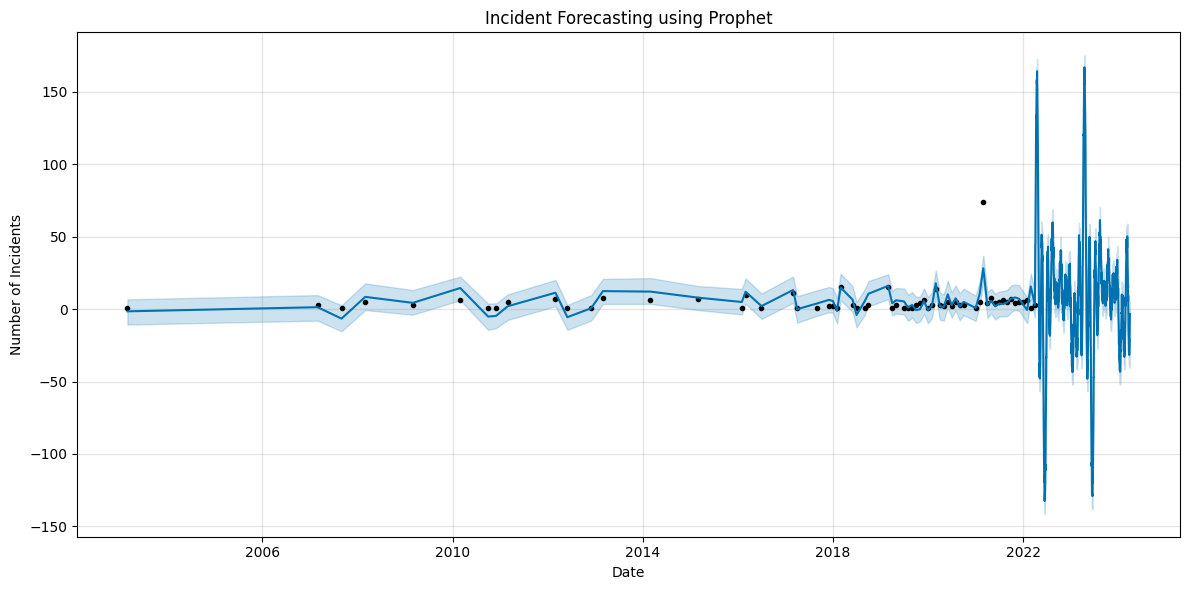

In [ ]:
# Time Series Forecasting using Prophet
# Prepare the data for Prophet (requires 'ds' and 'y' columns)
prophet_data = incident_counts.rename(columns={'date': 'ds', 'incident_count': 'y'})

# Create and fit the Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True)
model.fit(prophet_data)

# Make future predictions (next 2 years)
future = model.make_future_dataframe(periods=730)
forecast = model.predict(future)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
model.plot(forecast, xlabel='Date', ylabel='Number of Incidents', ax=plt.gca())
plt.title('Incident Forecasting using Prophet')
plt.tight_layout()
plt.show()

Method Analysis

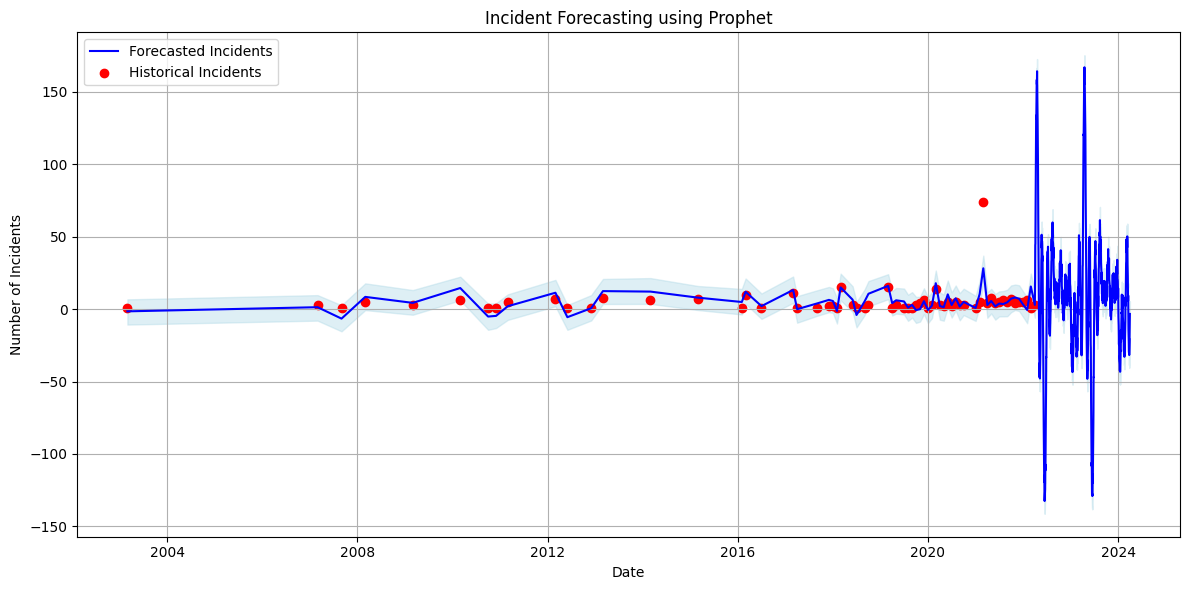

In [ ]:
# Plot the forecasted values with uncertainties
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], color='b', label='Forecasted Incidents')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightblue', alpha=0.4)
plt.scatter(incident_counts['date'], incident_counts['incident_count'], color='r', label='Historical Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.title('Incident Forecasting using Prophet')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming you have already loaded the DataFrame from the dataset

# Create a dictionary to map the old values to the new values
value_map = {
    "unknown": "Unknown",
    "malware": "Malware",
    "ddos": "DDoS",
    "phishing": "Phishing",
    "ransomware": "Ransomware",
    "other": "Other",
    "multiple": "Multiple",
    "misconfiguration": "Misconfiguration",
    "vulnerability exploit": "Vulnerability Exploit",
    "insider threat": "Insider Threat",
    "supply chain": "Supply Chain",
    "credential stuffing": "Credential Stuffing",
    "spoofing": "Spoofing",
    "sql injection": "SQL Injection",
    "brute force": "Brute Force",
    "ransomeware": "Ransomware",  # Correcting a typo in the provided dictionary
    "supply cain": "Supply Chain",  # Correcting a typo in the provided dictionary
    "zero-day exploit": "Zero-Day Exploit",
    "social engineering": "Social Engineering",
    "botnet": "Botnet",
    "whaling": "Whaling",
    "business email compromise": "Business Email Compromise",
    "third party service": "Third Party Service",
    "mitm": "Man-in-the-Middle",
    "brute forcing": "Brute Force",  # Correcting a typo in the provided dictionary
    "stolen password": "Stolen Password",
    "diskwiping": "Diskwiping",
    "zero day exploit": "Zero-Day Exploit",  # Correcting a typo in the provided dictionary
}

# Replace the old values with the new values
df["methods"] = df["methods"].replace(value_map)

# Print the simplified and cleaned values
print(df["methods"])

# Calculate the new value counts
values_counts2 = df['methods'].value_counts()
print("New value counts:", values_counts2)


0               Unknown
1      Misconfiguration
2              Phishing
3      Misconfiguration
4            Ransomware
             ...       
323             Malware
324      Insider Threat
325       SQL Injection
326            Phishing
327                DDoS
Name: methods, Length: 328, dtype: object
New value counts: Unknown                      98
Malware                      66
DDoS                         29
Phishing                     27
Ransomware                   24
Multiple                     20
Misconfiguration             14
Vulnerability Exploit        12
Insider Threat                9
Supply Chain                  8
Spoofing                      3
Brute Force                   3
Credential Stuffing           3
Zero-Day Exploit              2
SQL Injection                 2
Social engineering            1
Business email compromise     1
Whaling                       1
Man-in-the-Middle             1
Third party service           1
Botnet                        1
Stol

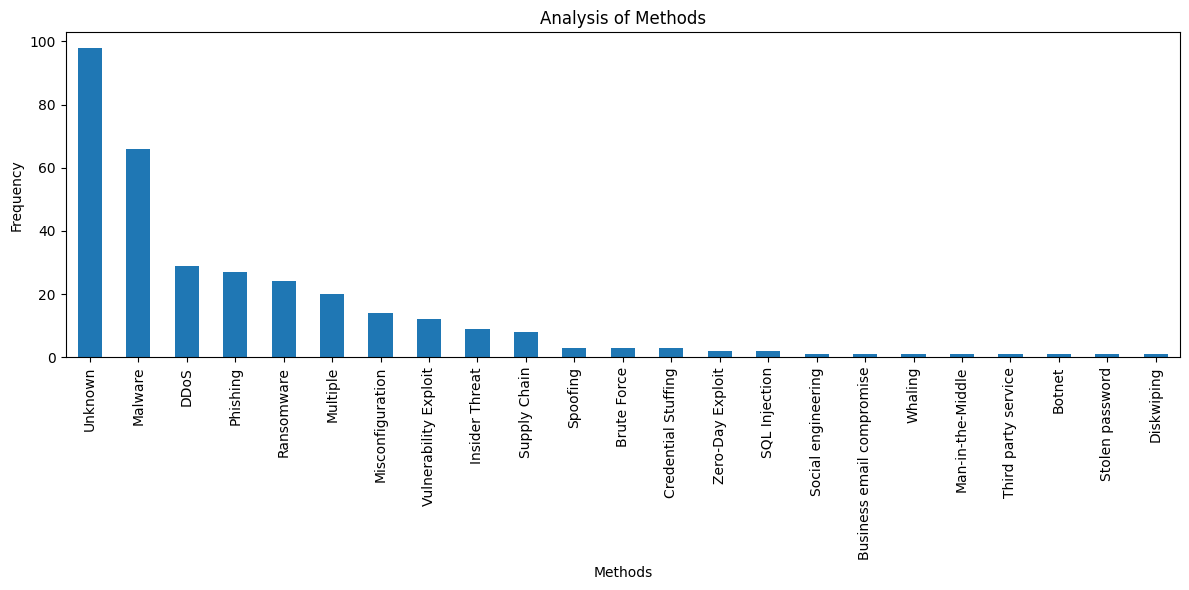

In [ ]:
    # Count the occurrences of each method
    method_counts = df['methods'].value_counts()

    # Plot the frequency of each method
    plt.figure(figsize=(12, 6))
    method_counts.plot(kind='bar')
    plt.title('Analysis of Methods')
    plt.xlabel('Methods')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
!pip install seaborn

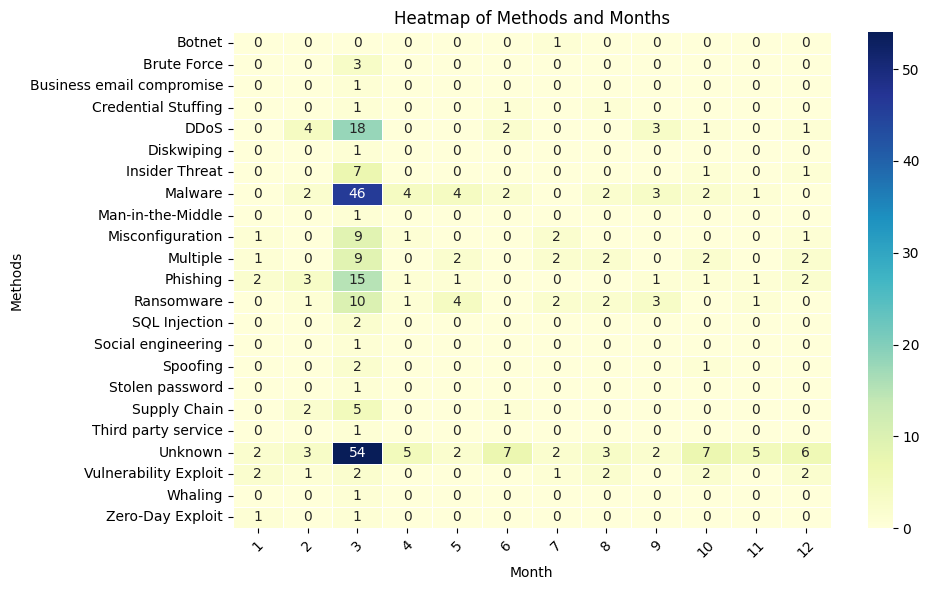

In [ ]:
import seaborn as sns

# Create a pivot table with methods as rows and months as columns
heatmap_data = df.pivot_table(index='methods', columns='month', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Heatmap of Methods and Months')
plt.xlabel('Month')
plt.ylabel('Methods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Group Methods: Brute force, credential stuffing, spoofing and stolen password

In [ ]:
# Define the variables you want to group
Authentication_attack = ['Brute Force', 'Credential Stuffing', 'Spoofing', 'Stolen password']

# Filter the DataFrame to include only the variables you want to group
grouped_df = df[df['methods'].isin(Authentication_attack)]

# Convert the filtered 'methods' column to a list
grouped_variables = grouped_df['methods'].tolist()

# Remove the original occurrences of grouped variables from the DataFrame
df = df[~df['methods'].isin(Authentication_attack)]

# Add the grouped variables list as a new row in the DataFrame
grouped_df = pd.concat([df, pd.DataFrame({'methods': [Authentication_attack]})], ignore_index=True)

# Create a dictionary to map the old values to the new values
value_map = {
    "[Brute Force, Credential Stuffing, Spoofing, Stolen password]": "Authentication_attack"}

# Replace the old values with the new values
grouped_df["methods"] = grouped_df["methods"].replace(value_map)


Repeat plots

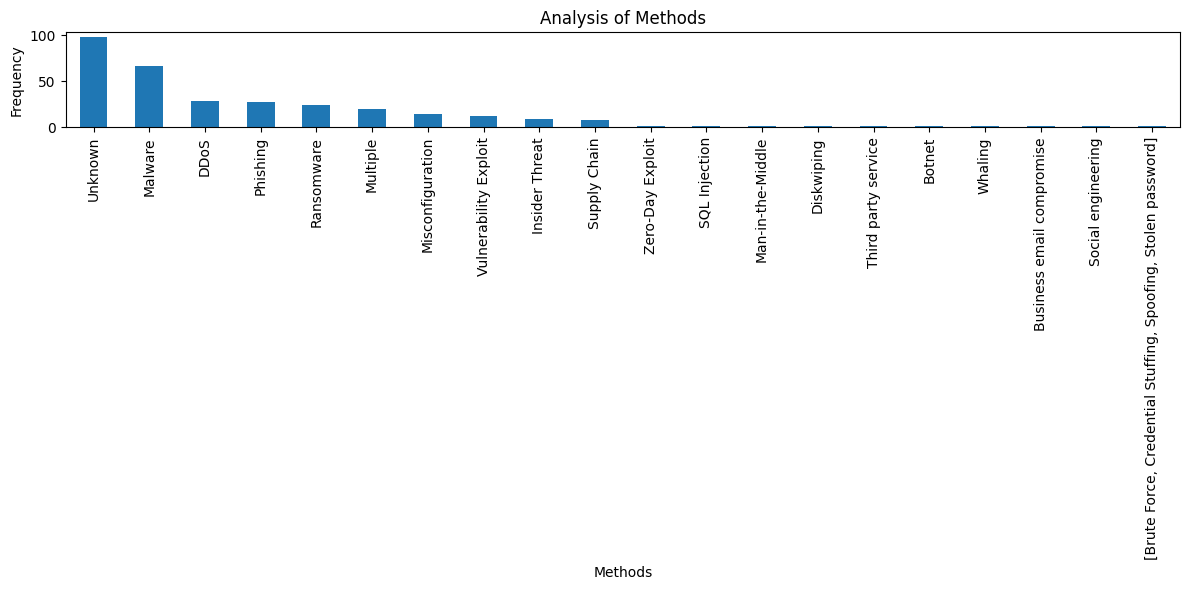

In [ ]:
    # Count the occurrences of each method
    method_counts = grouped_df['methods'].value_counts()

    # Plot the frequency of each method
    plt.figure(figsize=(12, 6))
    method_counts.plot(kind='bar')
    plt.title('Analysis of Methods')
    plt.xlabel('Methods')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Country Frequency

In [ ]:
# Calculate the frequency of occurrences for each country, including missing values
country_frequency = df['country'].value_counts(dropna=False)

# Print the full table of frequency count
print(country_frequency)

United States                                      63
Unknown                                            26
Multiple                                           19
South Africa                                       17
South Korea                                        15
                                                   ..
Singapore, South Africa, Scandinavian Countries     1
Nepal                                               1
Bulgaria, Chile, Costa Rica, Ghana                  1
United States and Canada                            1
Estonia                                             1
Name: country, Length: 95, dtype: int64


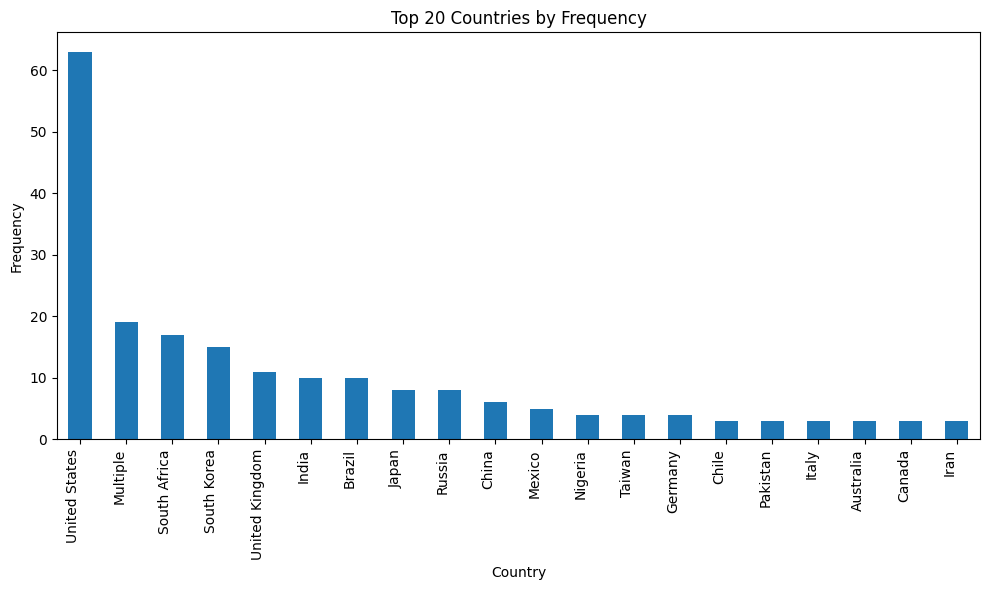

In [ ]:
# Remove the 'Unknown' country from the frequency counts
country_frequency = country_frequency.drop('Unknown', errors='ignore')

# Take the top 20 countries
top_20_countries = country_frequency.head(20)

# Plot the bar plot for the top 20 countries
plt.figure(figsize=(10, 6))
top_20_countries.plot(kind='bar')
plt.title('Top 20 Countries by Frequency')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

## **MODELS**

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import ast


df = pd.read_csv('book4.csv')

df['Incident'] = df['Incident'].str.lower()
monetary_values = []

for summary in df['summary']:
    # Define a regular expression pattern to match monetary values
    pattern = r"\$?(\d+(\.\d+)?\s?(million|billion|dollars))"
    matches = re.findall(pattern, summary)

    if matches:
        # Extract the first match and remove extra spaces and dollar signs
        monetary_value = matches[0][0].strip("$").replace(" ", "").lower()

        # Convert monetary value to numeric (assuming it's in millions)
        if "million" in monetary_value:
            monetary_value = float(monetary_value.strip("million")) * 1_000_000
        elif "billion" in monetary_value:
            monetary_value = float(monetary_value.strip("billion")) * 1_000_000_000
        else:
            monetary_value = float(monetary_value)

        monetary_values.append(monetary_value)
        print(f"Extracted monetary value: {monetary_value}")
    else:
        monetary_values.append(None)
        # print("No monetary value found in summary.")

# Add the extracted monetary values as a new column in the DataFrame
df['monetary_values'] = monetary_values

# Preprocessing: Select input features (summary or description) and target variable (financial_impact)
X = df['summary'].fillna('')  # Replace missing values with an empty string
y = df['monetary_values']

# Check if 'y' is a string, and if so, convert it to a dictionary
if isinstance(y.iloc[0], str):
    y = y.apply(ast.literal_eval)

# Convert the 'financial_impact' dictionary to a numeric representation (e.g., using the 'million' value)
y_numeric = y.apply(lambda x: x.get('million', 0))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Create a TF-IDF Vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter as needed.

# Create pipelines for different regression algorithms
linear_regression_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('regressor', LinearRegression())])
decision_tree_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('regressor', DecisionTreeRegressor())])
gradient_boosting_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('regressor', GradientBoostingRegressor())])

# Fit the models on the training data
linear_regression_pipeline.fit(X_train, y_train)
decision_tree_pipeline.fit(X_train, y_train)
gradient_boosting_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear_regression = linear_regression_pipeline.predict(X_test)
y_pred_decision_tree = decision_tree_pipeline.predict(X_test)
y_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)

# Evaluate the models using Mean Squared Error (MSE)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)

print("Linear Regression MSE:", mse_linear_regression)
print("Decision Tree MSE:", mse_decision_tree)
print("Gradient Boosting MSE:", mse_gradient_boosting)

# Visualization: Scatter plots to compare actual vs. predicted financial impact
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(y_test, y_pred_linear_regression, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title("Linear Regression")
plt.xlabel("Actual Financial Impact")
plt.ylabel("Predicted Financial Impact")

plt.subplot(132)
plt.scatter(y_test, y_pred_decision_tree, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title("Decision Tree Regression")
plt.xlabel("Actual Financial Impact")
plt.ylabel("Predicted Financial Impact")

plt.subplot(133)
plt.scatter(y_test, y_pred_gradient_boosting, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title("Gradient Boosting Regression")
plt.xlabel("Actual Financial Impact")
plt.ylabel("Predicted Financial Impact")

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Logistic Regression Accuracy: 0.59375
Random Forest Accuracy: 0.703125
SVM Accuracy: 0.703125
Logistic Regression Classification Report:
                  precision    recall  f1-score   support

Credential Theft       0.00      0.00      0.00         1
     Data Breach       1.00      0.13      0.24        15
      Disruption       1.00      0.12      0.22         8
        Multiple       0.00      0.00      0.00         2
           Theft       0.57      1.00      0.73        35
         Unknown       0.00      0.00      0.00         3

        accuracy                           0.59        64
       macro avg       0.43      0.21      0.20        64
    weighted avg       0.67      0.59      0.48        64

Random Forest Classification Report:
                  precision    recall  f1-score   support

Credential Theft       0.00      0.00      0.00         1
     Data Breach       1.00      0.27      0.42        15
      Disruption       1.00      0.75      0.86         8
        Mu

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

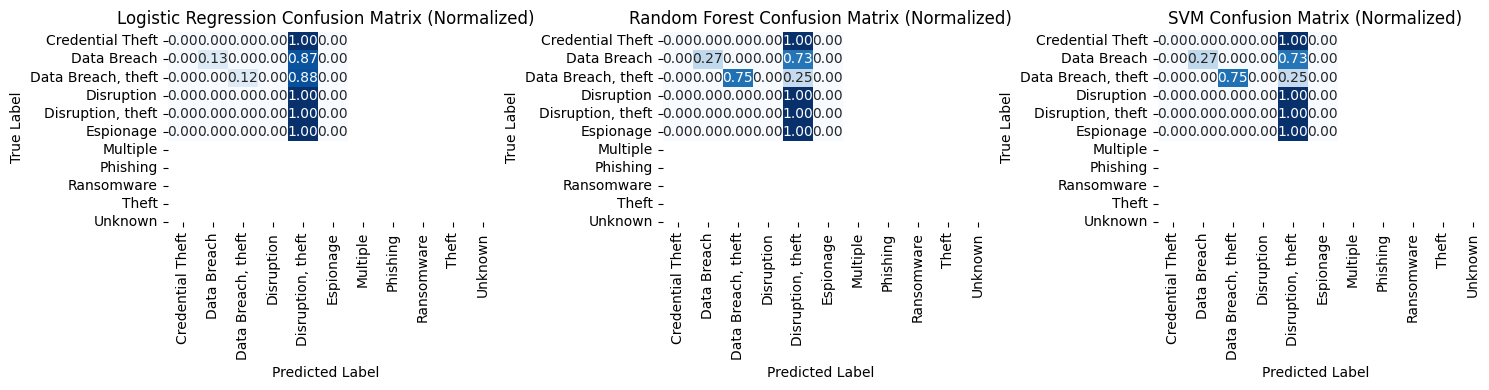

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have the data loaded in a DataFrame called 'df'
# If not, you can load the data using pd.read_csv() or other appropriate methods.

# Preprocessing: Select input features (summary or description) and target variable
X = df['summary'].fillna('')  # Replace missing values with an empty string
y = df['incident']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF Vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter as needed.

# Create pipelines for different classification algorithms
logreg_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('clf', LogisticRegression(max_iter=1000))])
rf_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('clf', RandomForestClassifier(n_estimators=100))])
svm_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('clf', SVC(kernel='linear', C=1.0))])

# Fit the models on the training data
logreg_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_svm = svm_pipeline.predict(X_test)

# Evaluate the models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# Classification Report for each model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Create a confusion matrix for each model and normalize it
cm_logreg = confusion_matrix(y_test, y_pred_logreg, normalize='true')
cm_rf = confusion_matrix(y_test, y_pred_rf, normalize='true')
cm_svm = confusion_matrix(y_test, y_pred_svm, normalize='true')

# Visualize normalized confusion matrices using heatmap
plt.figure(figsize=(15, 4))
plt.subplot(131)
sns.heatmap(cm_logreg, annot=True, fmt=".2f", cmap="Blues", cbar=False, xticklabels=logreg_pipeline.classes_, yticklabels=logreg_pipeline.classes_)
plt.title("Logistic Regression Confusion Matrix (Normalized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(132)
sns.heatmap(cm_rf, annot=True, fmt=".2f", cmap="Blues", cbar=False, xticklabels=rf_pipeline.classes_, yticklabels=rf_pipeline.classes_)
plt.title("Random Forest Confusion Matrix (Normalized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(133)
sns.heatmap(cm_svm, annot=True, fmt=".2f", cmap="Blues", cbar=False, xticklabels=svm_pipeline.classes_, yticklabels=svm_pipeline.classes_)
plt.title("SVM Confusion Matrix (Normalized)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()


predict the financial impact of incidents

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import ast

# Assuming you have the data loaded in a DataFrame called 'df'
# If not, you can load the data using pd.read_csv() or other appropriate methods.

# Preprocessing: Select input features (summary or description) and target variable (financial_impact)
X = df['summary'].fillna('')  # Replace missing values with an empty string
y = df['financial_impact']

# Check if 'y' is a string, and if so, convert it to a dictionary
if isinstance(y.iloc[0], str):
    y = y.apply(ast.literal_eval)

# Convert the 'financial_impact' dictionary to a numeric representation (e.g., using the 'million' value)
y_numeric = y.apply(lambda x: x.get('million', 0))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Create a TF-IDF Vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter as needed.

# Create pipelines for different regression algorithms
linear_regression_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('regressor', LinearRegression())])
decision_tree_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('regressor', DecisionTreeRegressor())])
gradient_boosting_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('regressor', GradientBoostingRegressor())])

# Fit the models on the training data
linear_regression_pipeline.fit(X_train, y_train)
decision_tree_pipeline.fit(X_train, y_train)
gradient_boosting_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear_regression = linear_regression_pipeline.predict(X_test)
y_pred_decision_tree = decision_tree_pipeline.predict(X_test)
y_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)

# Evaluate the models using Mean Squared Error (MSE)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)

print("Linear Regression MSE:", mse_linear_regression)
print("Decision Tree MSE:", mse_decision_tree)
print("Gradient Boosting MSE:", mse_gradient_boosting)

# Visualization: Scatter plots to compare actual vs. predicted financial impact
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(y_test, y_pred_linear_regression, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title("Linear Regression")
plt.xlabel("Actual Financial Impact")
plt.ylabel("Predicted Financial Impact")

plt.subplot(132)
plt.scatter(y_test, y_pred_decision_tree, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title("Decision Tree Regression")
plt.xlabel("Actual Financial Impact")
plt.ylabel("Predicted Financial Impact")

plt.subplot(133)
plt.scatter(y_test, y_pred_gradient_boosting, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title("Gradient Boosting Regression")
plt.xlabel("Actual Financial Impact")
plt.ylabel("Predicted Financial Impact")

plt.tight_layout()
plt.show()


NameError: ignored

# Trojans

In [ ]:
# Read the CSV file into a DataFrame
trojans = pd.read_csv('/content/drive/MyDrive/Hazael/hazel.csv', encoding='latin1', error_bad_lines=False)

# Print the first five rows
print(trojans.head(5))

# Get the number of rows and columns
num_rows = trojans.shape[0]
num_columns = df.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Convert column headers to lowercase
trojans.columns = trojans.columns.str.lower()

# Print the list of column headers
column_headers = trojans.columns.tolist()
print("Column headers:", column_headers)

<ipython-input-21-2a7053f88c9d>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  trojans = pd.read_csv('/content/drive/MyDrive/Hazael/hazel.csv', encoding='latin1', error_bad_lines=False)


  Column1       Column2              Column3  \
0      ID          Name  Associated Software   
1   S0066     3PARA RAT                  NaN   
2   S0065        4H RAT                  NaN   
3   S0677  AADInternals                  NaN   
4   S0469           ABK                  NaN   

                                             Column4  
0                                        Description  
1  3PARA RAT is a remote access tool (RAT) progra...  
2  4H RAT is malware that has been used by Putter...  
3  AADInternals is a PowerShell-based framework f...  
4  ABK is a downloader that has been used by BRON...  
Number of rows: 741
Number of columns: 11
Column headers: ['column1', 'column2', 'column3', 'column4']


In [ ]:
# Define the column name mapping
column_name_mapping = {
    'column1': 'id',
    'column2': 'name',
    'column3': 'associate software',
    'column4': 'description'
}

# Rename the columns using the dictionary mapping
trojans.rename(columns=column_name_mapping, inplace=True)

# Drop the first row from the DataFrame 'Trojans'
trojans = trojans.drop(trojans.index[0])

# Reset the index of the DataFrame after dropping the row
trojans.reset_index(drop=True, inplace=True)

# Print the DataFrame 'Trojans' with the desired column order
print(trojans)

        id          name      associate software  \
0    S0066     3PARA RAT                     NaN   
1    S0065        4H RAT                     NaN   
2    S0677  AADInternals                     NaN   
3    S0469           ABK                     NaN   
4    S1061   AbstractEmu                     NaN   
..     ...           ...                     ...   
735  S0086          ZLib                     NaN   
736  S0672           Zox  Gresim, ZoxRPC, ZoxPNG   
737  S0350       zwShell                     NaN   
738  S0412       ZxShell               Sensocode   
739  S1013          ZxxZ                     NaN   

                                           description  
0    3PARA RAT is a remote access tool (RAT) progra...  
1    4H RAT is malware that has been used by Putter...  
2    AADInternals is a PowerShell-based framework f...  
3    ABK is a downloader that has been used by BRON...  
4    AbstractEmu is mobile malware that was first s...  
..                               

In [ ]:
# Check for missing data
missing_data = trojans.isnull().sum()
if missing_data.sum() > 0:
    print("Missing data found:")
else:
    print("Non-missing data found.")

# Check for duplicates
# Convert the columns containing lists and dictionaries to tuples before checking for duplicates
trojans_copy = trojans.copy()
for col in trojans_copy.columns:
    if isinstance(trojans_copy[col].iloc[0], list):
        trojans_copy[col] = trojans_copy[col].apply(tuple)
    elif isinstance(trojans_copy[col].iloc[0], dict):
        trojans_copy[col] = trojans_copy[col].apply(tuple)

duplicates = trojans_copy.duplicated().sum()
if duplicates > 0:
    print("Duplicates found:")
else:
    print("No duplicates found.")

# Function to handle 0 values by filling with mode
def fill_zeros_with_mode(data, column):
    mode_value = data[column].mode().iloc[0]
    data[column] = data[column].replace(0, mode_value)
    return data

# Check for 0 values in numeric columns and fill with mode
numeric_columns = trojans.select_dtypes(include='number').columns
zero_values = []

for column in numeric_columns:
    zero_values_in_column =trojans[trojans[column] == 0]
    if not zero_values_in_column.empty:
        zero_values.append(zero_values_in_column)

# Check if zero values were found and fill with mode
if len(zero_values) > 0:
    combined_zero_values = pd.concat(zero_values)
    for column in numeric_columns:
        trojans = fill_zeros_with_mode(trojans, column)

    print("0 values found and filled with mode.")
else:
    print("No 0 values found in numeric columns.")

Missing data found:
No duplicates found.
No 0 values found in numeric columns.


In [ ]:
# Forward fill missing values (carry forward the last valid value)
trojans.fillna(method='ffill', inplace=True)

# Backward fill missing values (use the next valid value)
trojans.fillna(method='bfill', inplace=True)


# Check for missing data
missing_data = trojans.isnull().sum()
if missing_data.sum() > 0:
    print("Missing data found:")
else:
    print("Non-missing data found.")

Non-missing data found.


In [ ]:
print(trojans)

        id          name              associate software  \
0    S0066     3PARA RAT  AZZY, EVILTOSS, NETUI, Sedreco   
1    S0065        4H RAT  AZZY, EVILTOSS, NETUI, Sedreco   
2    S0677  AADInternals  AZZY, EVILTOSS, NETUI, Sedreco   
3    S0469           ABK  AZZY, EVILTOSS, NETUI, Sedreco   
4    S1061   AbstractEmu  AZZY, EVILTOSS, NETUI, Sedreco   
..     ...           ...                             ...   
735  S0086          ZLib                         Zekapab   
736  S0672           Zox          Gresim, ZoxRPC, ZoxPNG   
737  S0350       zwShell          Gresim, ZoxRPC, ZoxPNG   
738  S0412       ZxShell                       Sensocode   
739  S1013          ZxxZ                       Sensocode   

                                           description  
0    3PARA RAT is a remote access tool (RAT) progra...  
1    4H RAT is malware that has been used by Putter...  
2    AADInternals is a PowerShell-based framework f...  
3    ABK is a downloader that has been used by BRON

In [ ]:
print(df)

                                                 title  month  year  \
0                 Beanstalk Farms cryptocurrency theft      4  2022   
1                                 CashMama Data Breach      4  2022   
2    Lazarus Ã¢ÂÂTrojanisedÃ¢ÂÂ decentralised f...      4  2022   
3                           Ronin cryptocurrency theft      3  2022   
4                            TransUnion SA Data Breach      3  2021   
..                                                 ...    ...   ...   
323                                 Citibank ATM Theft      3  2008   
324                  SociÂtÂ GÂnÂrale Rogue Trader      3  2008   
325                            DA Davidson Data Breach      3  2017   
326                          TD Ameritrade Data Breach      9  2007   
327                              Estonian DDoS Attacks      3  2007   

                                               summary     incident  \
0    the decentralised finance platform Beanstalk F...        Theft   
1    

# **DATA ANALYSIS**

In [ ]:
# Calculate the frequency of variables in the 'name' column based on the 'incident' column
name_frequency = df.groupby(trojans['name'])['incident'].value_counts()

# Print the frequency of occurrences
print(name_frequency)

name          incident   
3PARA RAT     Theft          1
4H RAT        Data Breach    1
AADInternals  Multiple       1
ABK           Theft          1
ACAD/Medre.A  Disruption     1
                            ..
httpclient    Theft          1
iKitten       Theft          1
ifconfig      Data Breach    1
ipconfig      Theft          1
jRAT          Data Breach    1
Name: incident, Length: 318, dtype: int64


name          incident   
3PARA RAT     Theft          1
4H RAT        Data Breach    1
AADInternals  Multiple       1
ABK           Theft          1
ACAD/Medre.A  Disruption     1
                            ..
httpclient    Theft          1
iKitten       Theft          1
ifconfig      Data Breach    1
ipconfig      Theft          1
jRAT          Data Breach    1
Name: incident, Length: 318, dtype: int64


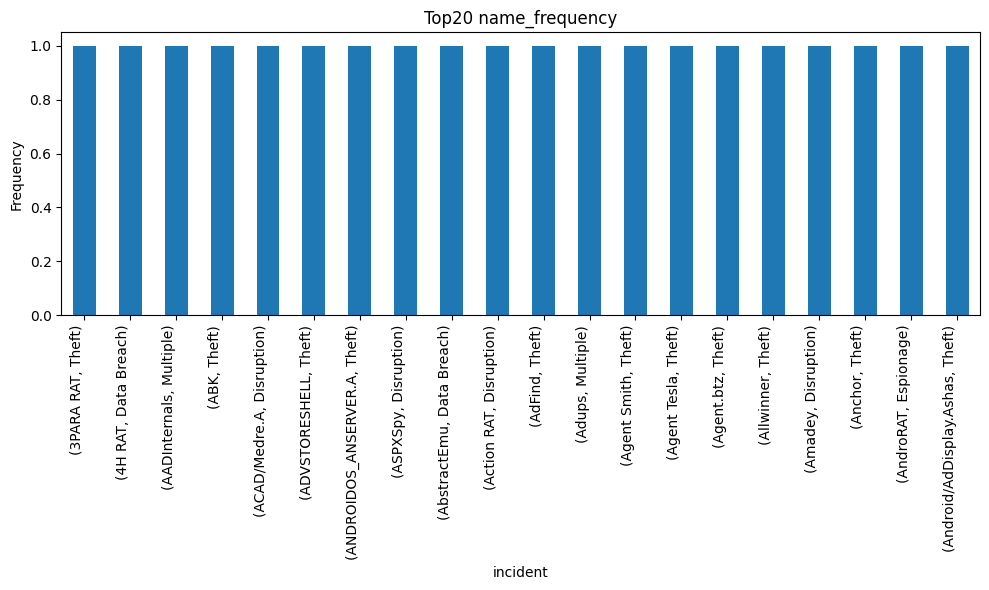

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the DataFrames 'df' and 'trojans'

# Calculate the frequency of variables in the 'name' column based on the 'incident' column
name_frequency = df.groupby(trojans['name'])['incident'].value_counts()

# Print the frequency of occurrences
print(name_frequency)

# Get the top 10 countries with the highest frequency
top_20_name_frequency = name_frequency.head(20)

# Plot the bar plot for the top 10 countries
plt.figure(figsize=(10, 6))
top_20_name_frequency.plot(kind='bar')
plt.title('Top20 name_frequency')
plt.xlabel('incident')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Others

In [ ]:
# Read the CSV file into a DataFrame
df2 = pd.read_csv('/content/drive/MyDrive/Hazael/hazel 2.csv', encoding='latin1', error_bad_lines=False)

# Print the first five rows
print(df2.head(5))

# Get the number of rows and columns
num_rows = df2.shape[0]
num_columns = df2.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Convert column headers to lowercase
df2.columns = df2.columns.str.lower()

# Print the list of column headers
column_headers = df2.columns.tolist()
print("Column headers:", column_headers)

<ipython-input-29-88ed39827be0>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df2 = pd.read_csv('/content/drive/MyDrive/Hazael/hazel 2.csv', encoding='latin1', error_bad_lines=False)


                 Name
0           admin@338
1  Ajax Security Team
2            ALLANITE
3            Andariel
4        Aoqin Dragon
Number of rows: 138
Number of columns: 1
Column headers: ['name']


In [ ]:
# Check for missing data
missing_data = df2.isnull().sum()
if missing_data.sum() > 0:
    print("Missing data found:")
else:
    print("Non-missing data found.")

# Check for duplicates
# Convert the columns containing lists and dictionaries to tuples before checking for duplicates
df2_copy = df2.copy()
for col in df2_copy.columns:
    if isinstance(df2_copy[col].iloc[0], list):
        df2_copy[col] = df2_copy[col].apply(tuple)
    elif isinstance(df2_copy[col].iloc[0], dict):
        df2_copy[col] = df2_copy[col].apply(tuple)

duplicates = df2_copy.duplicated().sum()
if duplicates > 0:
    print("Duplicates found:")
else:
    print("No duplicates found.")

# Function to handle 0 values by filling with mode
def fill_zeros_with_mode(data, column):
    mode_value = data[column].mode().iloc[0]
    data[column] = data[column].replace(0, mode_value)
    return data

# Check for 0 values in numeric columns and fill with mode
numeric_columns = df2.select_dtypes(include='number').columns
zero_values = []

for column in numeric_columns:
    zero_values_in_column =df2[df2[column] == 0]
    if not zero_values_in_column.empty:
        zero_values.append(zero_values_in_column)

# Check if zero values were found and fill with mode
if len(zero_values) > 0:
    combined_zero_values = pd.concat(zero_values)
    for column in numeric_columns:
        df2 = fill_zeros_with_mode(df2, column)

    print("0 values found and filled with mode.")
else:
    print("No 0 values found in numeric columns.")

Non-missing data found.
No duplicates found.
No 0 values found in numeric columns.


Analysis

In [ ]:
# Calculate the frequency of variables in the 'name' column based on the 'incident' column
name_frequency2 = df.groupby(df2['name'])['incident'].value_counts()

# Print the frequency of occurrences
print(name_frequency2)

name           incident   
ALLANITE       Multiple       1
APT-C-36       Disruption     1
APT1           Disruption     1
APT12          Disruption     1
APT16          Theft          1
                             ..
Winnti Group   Theft          1
Wizard Spider  Theft          1
ZIRCONIUM      Data Breach    1
admin@338      Theft          1
menuPass       Theft          1
Name: incident, Length: 133, dtype: int64


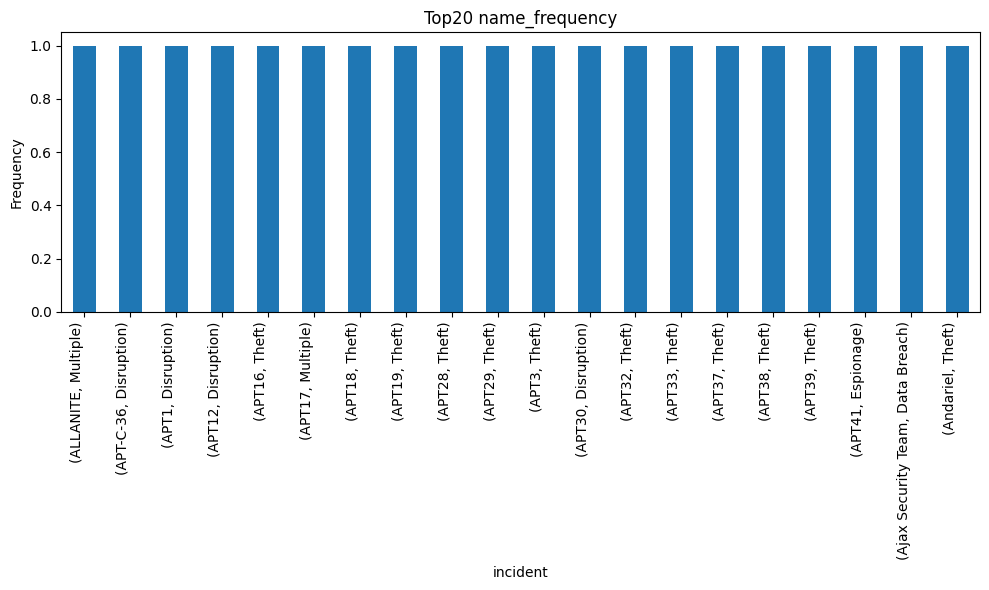

In [ ]:
# Get the top 10 countries with the highest frequency
top_20_name_frequency = name_frequency2.head(20)

# Plot the bar plot for the top 10 countries
plt.figure(figsize=(10, 6))
top_20_name_frequency.plot(kind='bar')
plt.title('Top20 name_frequency')
plt.xlabel('incident')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

Extracted monetary value: 180000000.0
Extracted monetary value: 615000000.0
Extracted monetary value: 36000000.0
Extracted monetary value: 322000000.0
Extracted monetary value: 80000000.0
Extracted monetary value: 1400000.0
Extracted monetary value: 35000000.0
Extracted monetary value: 13700000.0
Extracted monetary value: 77700000.0
Extracted monetary value: 200000000.0
Extracted monetary value: 120300000.0
Extracted monetary value: 55000000.0
Extracted monetary value: 130000000.0
Extracted monetary value: 29000000.0
Extracted monetary value: 97000000.0
Extracted monetary value: 600000000.0
Extracted monetary value: 1300000000.0
Extracted monetary value: 2900000.0
Extracted monetary value: 24000000.0
Extracted monetary value: 100000000.0
Extracted monetary value: 25000000.0
Extracted monetary value: 7500000.0
Extracted monetary value: 22500000.0
Extracted monetary value: 809000000.0
Extracted monetary value: 10000000.0
Extracted monetary value: 25000000.0
Extracted monetary value: 3500

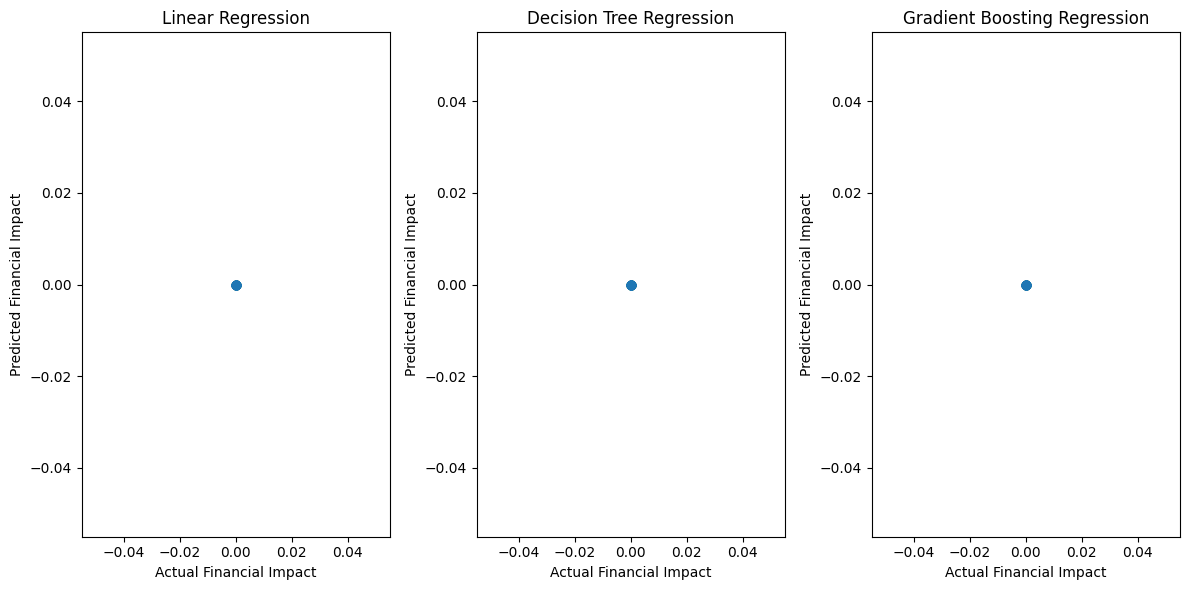

In [36]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import ast


df['incident'] = df['incident'].str.lower()
monetary_values = []

for summary in df['summary']:
    # Define a regular expression pattern to match monetary values
    pattern = r"\$?(\d+(\.\d+)?\s?(million|billion|dollars))"
    matches = re.findall(pattern, summary)

    if matches:
        # Extract the first match and remove extra spaces and dollar signs
        monetary_value = matches[0][0].strip("$").replace(" ", "").lower()

        # Convert monetary value to numeric (assuming it's in millions)
        if "million" in monetary_value:
            monetary_value = float(monetary_value.strip("million")) * 1_000_000
        elif "billion" in monetary_value:
            monetary_value = float(monetary_value.strip("billion")) * 1_000_000_000
        else:
            monetary_value = float(monetary_value)

        monetary_values.append(monetary_value)
        print(f"Extracted monetary value: {monetary_value}")
    else:
        monetary_values.append(None)
        # print("No monetary value found in summary.")

# Add the extracted monetary values as a new column in the DataFrame
df['monetary_values'] = monetary_values

# Preprocessing: Select input features (summary or description) and target variable (financial_impact)
X = df['summary'].fillna('')  # Replace missing values with an empty string
y = df['monetary_values']

# Check if 'y' is a string, and if so, convert it to a dictionary
if isinstance(y.iloc[0], str):
    y = y.apply(ast.literal_eval)

# Convert the 'financial_impact' dictionary to a numeric representation (e.g., using the 'million' value)
def convert_to_numeric(impact):
    if isinstance(impact, dict) and 'million' in impact:
        return impact['million']
    else:
        return 0

y_numeric = y.apply(convert_to_numeric)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Create a TF-IDF Vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter as needed.

# Create pipelines for different regression algorithms
linear_regression_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('regressor', LinearRegression())])
decision_tree_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('regressor', DecisionTreeRegressor())])
gradient_boosting_pipeline = Pipeline([('tfidf', tfidf_vectorizer), ('regressor', GradientBoostingRegressor())])

# Fit the models on the training data
linear_regression_pipeline.fit(X_train, y_train)
decision_tree_pipeline.fit(X_train, y_train)
gradient_boosting_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear_regression = linear_regression_pipeline.predict(X_test)
y_pred_decision_tree = decision_tree_pipeline.predict(X_test)
y_pred_gradient_boosting = gradient_boosting_pipeline.predict(X_test)

# Evaluate the models using Mean Squared Error (MSE)
mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)

print("Linear Regression MSE:", mse_linear_regression)
print("Decision Tree MSE:", mse_decision_tree)
print("Gradient Boosting MSE:", mse_gradient_boosting)

# Visualization: Scatter plots to compare actual vs. predicted financial impact
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(y_test, y_pred_linear_regression, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title("Linear Regression")
plt.xlabel("Actual Financial Impact")
plt.ylabel("Predicted Financial Impact")

plt.subplot(132)
plt.scatter(y_test, y_pred_decision_tree, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title("Decision Tree Regression")
plt.xlabel("Actual Financial Impact")
plt.ylabel("Predicted Financial Impact")

plt.subplot(133)
plt.scatter(y_test, y_pred_gradient_boosting, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title("Gradient Boosting Regression")
plt.xlabel("Actual Financial Impact")
plt.ylabel("Predicted Financial Impact")

plt.tight_layout()
plt.show()